# <center> Bank Marketing UCI </center>

### Description of the dataset : 

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
    ##### bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   #### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   #### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


### Data Reading & Exploration: 

In [106]:
import pandas as pd 

In [107]:
df = pd.read_csv(r'C:\Users\EMINE\Desktop\IBM ML\IBM Supervised Machine Learning Classification\Final Project\bank.csv',delimiter=';')

In [108]:
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [109]:
print(df.shape)

(4521, 17)


In [110]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [111]:
Y = df['y']

In [112]:
print(Y)

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object


In [113]:
Y.value_counts()


y
no     4000
yes     521
Name: count, dtype: int64

<Axes: xlabel='y'>

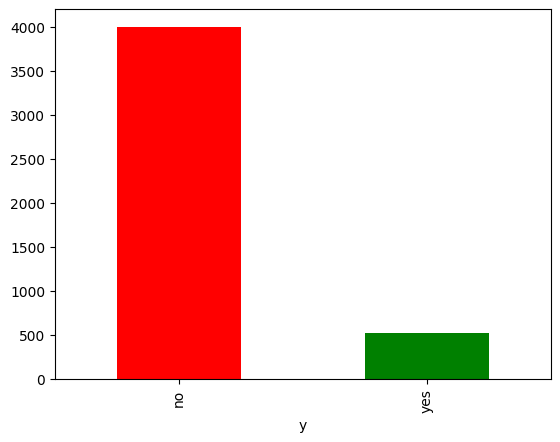

In [114]:
Y.value_counts().plot.bar(color=["red","green"])

In [115]:
X = df [df.columns[df.columns != 'y']]

In [ ]:
print(X)

                age      job    marital education  default balance housing  \
0        unemployed  married    primary        no     1787      no      no   
1          services  married  secondary        no     4789     yes     yes   
2        management   single   tertiary        no     1350     yes      no   
3        management  married   tertiary        no     1476     yes     yes   
4       blue-collar  married  secondary        no        0     yes      no   
...             ...      ...        ...       ...      ...     ...     ...   
4516       services  married  secondary        no     -333     yes      no   
4517  self-employed  married   tertiary       yes    -3313     yes     yes   
4518     technician  married  secondary        no      295      no      no   
4519    blue-collar  married  secondary        no     1137      no      no   
4520   entrepreneur   single   tertiary        no     1136     yes     yes   

          loan  contact  day  month  duration  campaign  pdays 

### One-Hot Encoding of X :

In [121]:


# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

print(categorical_columns)


# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Now, X_encoded contains the one-hot encoded features


print(X_encoded.head())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   30     1787   19        79         1     -1         0       False   
1   33     4789   11       220         1    339         4       False   
2   35     1350   16       185         1    330         1       False   
3   30     1476    3       199         4     -1         0       False   
4   59        0    5       226         1     -1         0       False   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False       True   
2            False             False  ...      False      False      False   
3            False             False  ...       True      False      False   
4             True             False  ...

In [125]:
X_without_categorical = X.drop(columns=categorical_columns)

print(X_without_categorical)

      age  balance  day  duration  campaign  pdays  previous  age  balance  \
0      30     1787   19        79         1     -1         0   30     1787   
1      33     4789   11       220         1    339         4   33     4789   
2      35     1350   16       185         1    330         1   35     1350   
3      30     1476    3       199         4     -1         0   30     1476   
4      59        0    5       226         1     -1         0   59        0   
...   ...      ...  ...       ...       ...    ...       ...  ...      ...   
4516   33     -333   30       329         5     -1         0   33     -333   
4517   57    -3313    9       153         1     -1         0   57    -3313   
4518   57      295   19       151        11     -1         0   57      295   
4519   28     1137    6       129         4    211         3   28     1137   
4520   44     1136    3       345         2    249         7   44     1136   

      day  ...  month_jun  month_mar  month_may  month_nov  mon

In [126]:
X = pd.concat([X_without_categorical, X_encoded], axis=1)

print(X)

      age  balance  day  duration  campaign  pdays  previous  age  balance  \
0      30     1787   19        79         1     -1         0   30     1787   
1      33     4789   11       220         1    339         4   33     4789   
2      35     1350   16       185         1    330         1   35     1350   
3      30     1476    3       199         4     -1         0   30     1476   
4      59        0    5       226         1     -1         0   59        0   
...   ...      ...  ...       ...       ...    ...       ...  ...      ...   
4516   33     -333   30       329         5     -1         0   33     -333   
4517   57    -3313    9       153         1     -1         0   57    -3313   
4518   57      295   19       151        11     -1         0   57      295   
4519   28     1137    6       129         4    211         3   28     1137   
4520   44     1136    3       345         2    249         7   44     1136   

      day  ...  month_jun  month_mar  month_may  month_nov  mon

### Imbalance Classes Processing: and Data Splitting:

In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split




In [133]:

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

### Decision Tree Classifier :

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [153]:

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = decision_tree.predict(X_test)



In [154]:
# Evaluate the performance
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.91125
Confusion Matrix:
[[720  81]
 [ 61 738]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.90      0.91       801
         yes       0.90      0.92      0.91       799

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600




Confusion Matrix:
 [[722  79]
 [122 677]]


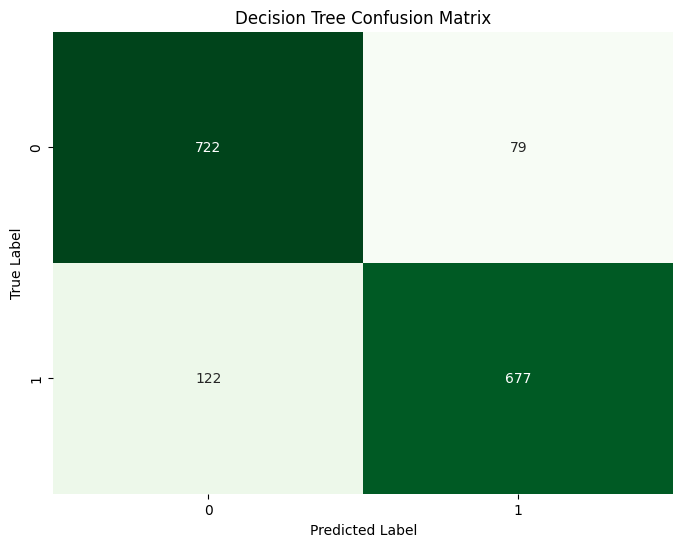

In [149]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [136]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

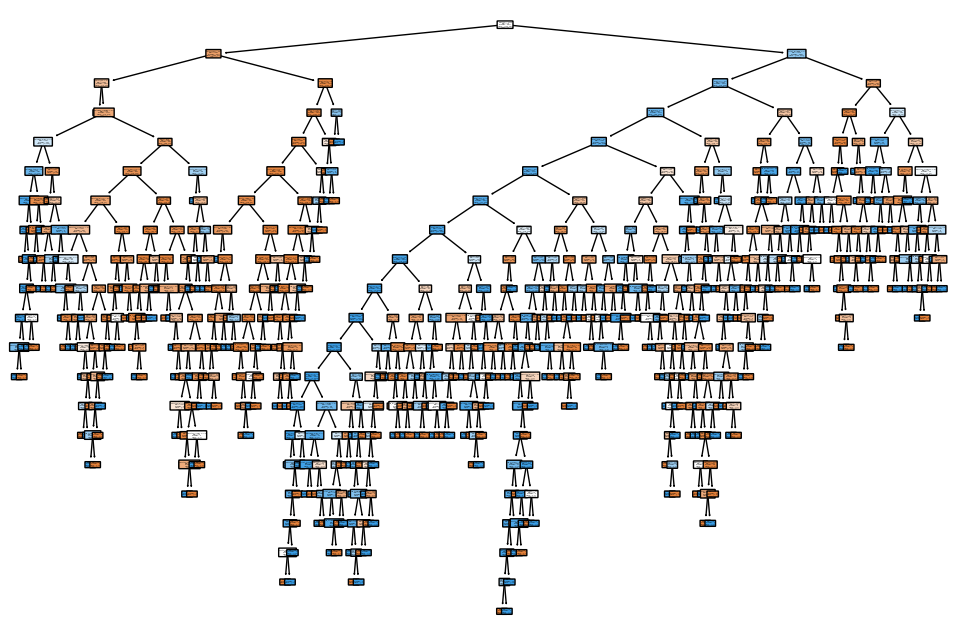

In [137]:

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=Y.unique(), filled=True, rounded=True)
plt.show()


### Logistic Regression Classification :

In [150]:
from sklearn.linear_model import LogisticRegression

In [146]:
# Train a Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression.predict(X_test)


C:\Users\EMINE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

          no       0.86      0.90      0.88       801
         yes       0.90      0.85      0.87       799

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600


Confusion Matrix:
 [[722  79]
 [122 677]]


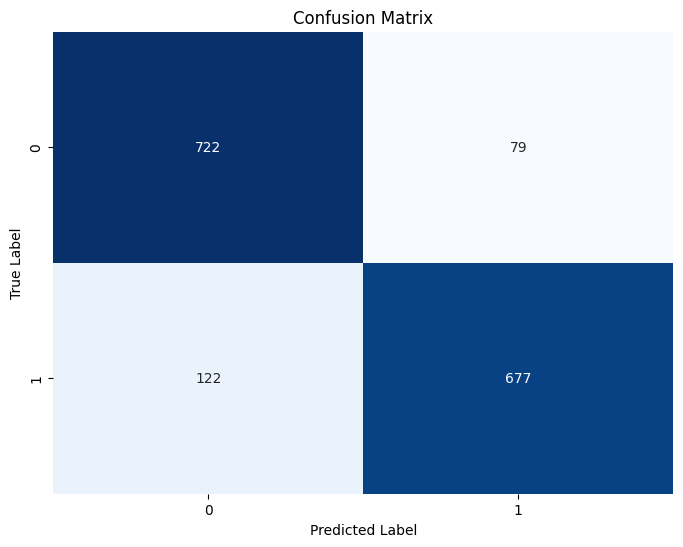

In [143]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Balanced Random Forest Classifier :


In [168]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [169]:
# Use BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = brf_model.predict(X_test)

C:\Users\EMINE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\EMINE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [173]:


# Calculate metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, pos_label='yes')
recall = recall_score(Y_test, y_pred, pos_label='yes')
f1 = f1_score(Y_test, y_pred, pos_label='yes')
conf_matrix = confusion_matrix(Y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Generate classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.9463
Precision: 0.9541
Recall: 0.9374
F1 Score: 0.9457
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95       801
         yes       0.95      0.94      0.95       799

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [174]:
# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[765  36]
 [ 50 749]]


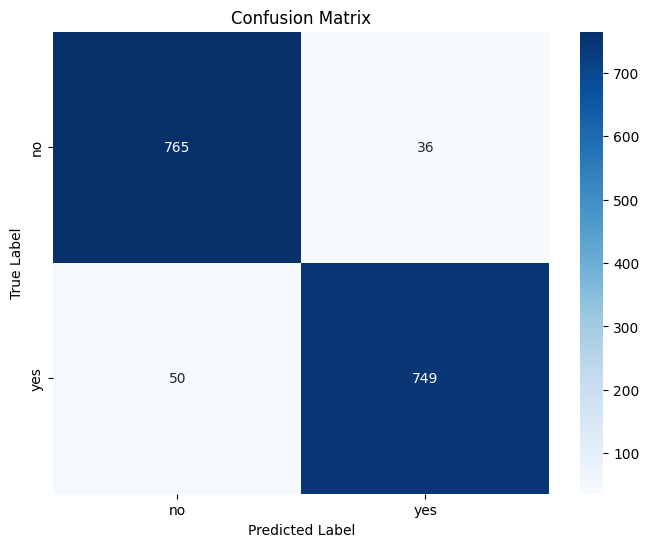

In [175]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Conclusion 

A comparaison between all models: 

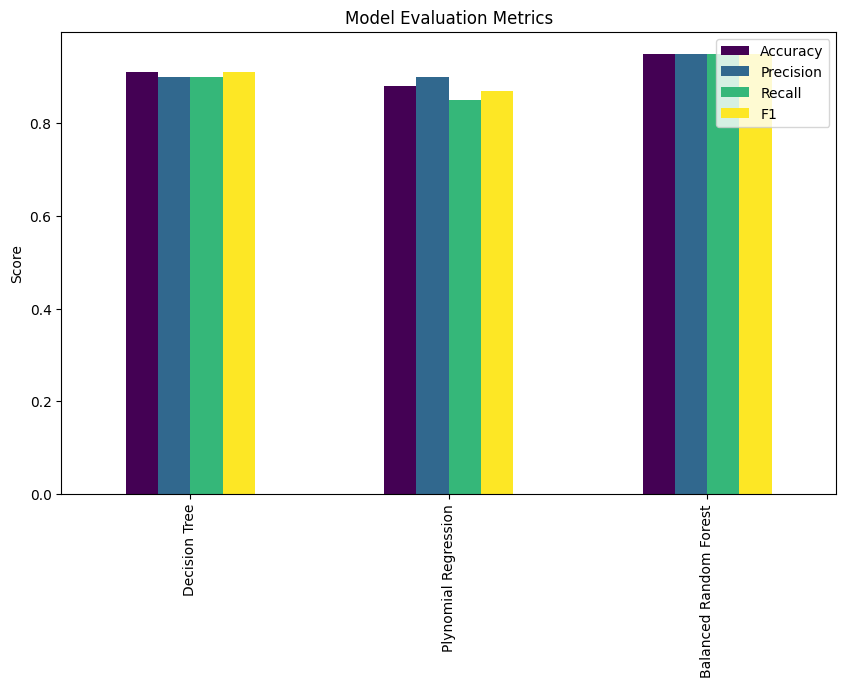

In [176]:
import matplotlib.pyplot as plt

# Example metrics collection
model_metrics = {
    'Decision Tree': {'Accuracy': 0.91, 'Precision': 0.90, 'Recall': 0.90, 'F1': 0.91},
    'Plynomial Regression': {'Accuracy': 0.88, 'Precision': 0.90, 'Recall': 0.85, 'F1': 0.87},
    'Balanced Random Forest': {'Accuracy': 0.95, 'Precision': 0.95, 'Recall': 0.95, 'F1': 0.95},
}

# Convert metrics to a DataFrame for easier plotting (optional)
import pandas as pd
df_metrics = pd.DataFrame.from_dict(model_metrics, orient='index')

# Plotting
df_metrics.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()

It's quite appealing that Balanced Random Forest is the better option 